# Clustering

In [14]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [15]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only

import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [16]:
#########################begin code for Task 1-a - 10 Points
data = pd.read_csv('DataSet_1.csv')
data.head(10)
    

## Describe which is the optimal value for K and explain why you choose it as the optimal value


,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              5000 non-null   int64 
 1   WorkClass        5000 non-null   object
 2   Fnlwght          5000 non-null   int64 
 3   Education        5000 non-null   object
 4   EducationNumber  5000 non-null   int64 
 5   MaritalStatus    5000 non-null   object
 6   Occupation       5000 non-null   object
 7   Relationship     5000 non-null   object
 8   Race             5000 non-null   object
 9   Sex              5000 non-null   object
 10  CapitalGain      5000 non-null   int64 
 11  CapitalLoss      5000 non-null   int64 
 12  HoursPerWeek     5000 non-null   int64 
 13  NativeCountry    5000 non-null   object
 14  Class            5000 non-null   object
dtypes: int64(6), object(9)
memory usage: 586.1+ KB


In [18]:
#since we have 9 classes with data type of objects we use label encoder to parse them into int data type
le=LabelEncoder()
data['WorkClass']=le.fit_transform(data['WorkClass'])
data['Education']=le.fit_transform(data['Education'])
data['Occupation']=le.fit_transform(data['Occupation'])
data['Relationship']=le.fit_transform(data['Relationship'])
data['MaritalStatus']=le.fit_transform(data['MaritalStatus'])
data['Race']=le.fit_transform(data['Race'])
data['NativeCountry']=le.fit_transform(data['NativeCountry'])
data['Class']=le.fit_transform(data['Class'])
data['Sex']=le.fit_transform(data['Sex'])


In [19]:
data.info()
#here we can observe that the data types have been changed to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              5000 non-null   int64
 1   WorkClass        5000 non-null   int64
 2   Fnlwght          5000 non-null   int64
 3   Education        5000 non-null   int64
 4   EducationNumber  5000 non-null   int64
 5   MaritalStatus    5000 non-null   int64
 6   Occupation       5000 non-null   int64
 7   Relationship     5000 non-null   int64
 8   Race             5000 non-null   int64
 9   Sex              5000 non-null   int64
 10  CapitalGain      5000 non-null   int64
 11  CapitalLoss      5000 non-null   int64
 12  HoursPerWeek     5000 non-null   int64
 13  NativeCountry    5000 non-null   int64
 14  Class            5000 non-null   int64
dtypes: int64(15)
memory usage: 586.1 KB


In [20]:
inertia = [] 
for i in range(1, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(data) 
    inertia.append(kmeans.inertia_)
    
inertia

[56799989038025.53,
 22615128945491.055,
 11910234393381.148,
 7629940331904.886,
 5416154160162.715,
 3732264437118.035,
 2847343786096.8955,
 2259972048794.255,
 1876582347859.1562]

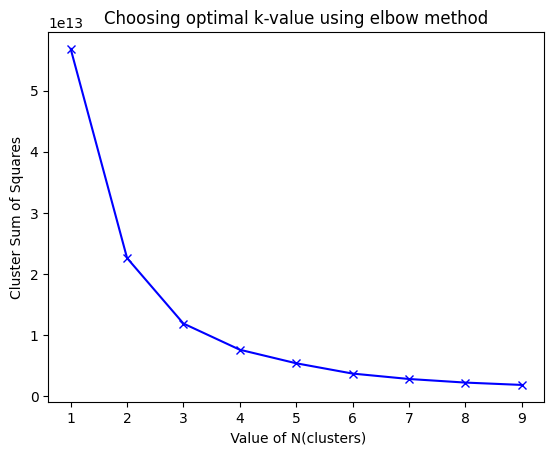

Optimal k : 2


In [21]:
plt.plot(range(1,10),inertia,'bx-')
plt.title('Choosing optimal k-value using elbow method')
plt.xlabel(' Value of N(clusters)')
plt.ylabel('Cluster Sum of Squares')
plt.show()
print("Optimal k :",2)
# we select k =2 because, after 2 we can see that the grapgh is linearly decreasing

### Task 1-b: Visualization for K-Means Clustering 

--> Performing k-means clustering for k=3,4,5 and visualize the predicted training samples and actual training samples on scatter plots. 

--> Use 75% of the dataset for training and 25% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

--> Visualize predicted training samples and actual training samples on two scatter plots.Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA.You can easily apply PCA to your data with the help of scikit-learn.



In [22]:
###################begin code for Task 1-b-1: Split the datasetand set the random_state as 2021 without fail - 5 points

### Important!!!
X = data.iloc[:, [0,13]].values
y = data.iloc[:, [14]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=2022)
print(X_test.shape) #printing the X_test.shape to get the shape of X
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

###################end code for Task 1-b-1

(1500, 2)
(3500, 2)
(3500, 1)
(1500, 1)


Plot for predicted label training at k = 3 


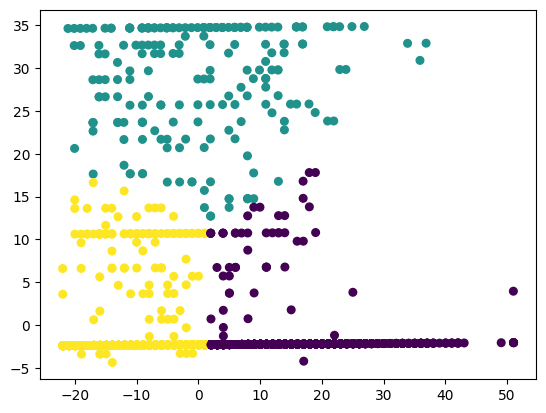

Plot for actual label training at k = 3 


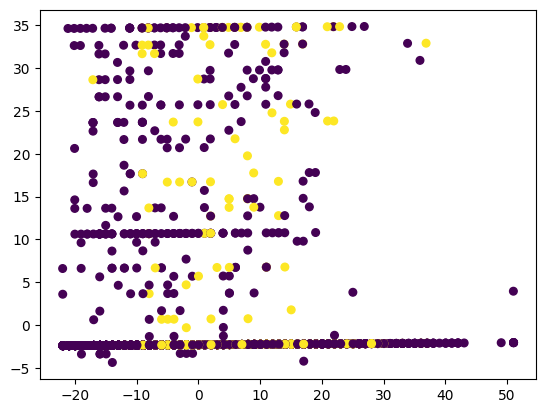

In [23]:

####Task 1-b-2: Visualize the predicted training labels vs actual training labels - 10 points
# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
kmeans = KMeans(n_clusters = 3, random_state = 2022)
y_pred = kmeans.fit_predict(X_train)


# Compute cluster centers and predict cluster index for each sample 
centers = kmeans.cluster_centers_

# Model and fit the data to the PCA model
pca=PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]


###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
kmeans = KMeans(n_clusters = 3, random_state = 2021)
y_pred = kmeans.fit_predict(X_train)

# Compute cluster centers and predict cluster index for each sample 
centers = kmeans.cluster_centers_

# Model and fit the data to the PCA model
pca=PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

print("Plot for predicted label training at k = 3 ")
plt.scatter(x,y,c=y_pred,s=30,cmap='viridis')
plt.show()
print("Plot for actual label training at k = 3 ")
plt.scatter(x,y,c=y_train,s=30,cmap='viridis')
plt.show()


###################end code for Task 1-b-2


## Visualize using K=3,4,5 as well

#####end Task 1-b-2


Plot for predicted label training at k = 4 


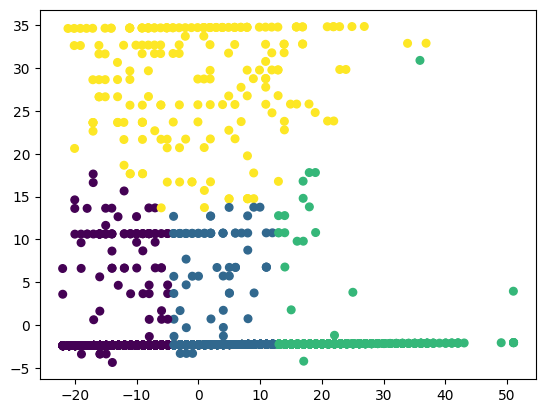

Plot for actual label training at k = 4 


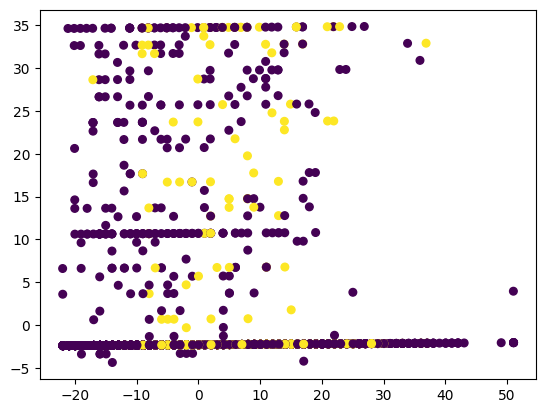

In [24]:
# Create the KMeans model for k = 4
kmeans4 = KMeans(n_clusters = 4, random_state = 2021)
y_pred4 = kmeans4.fit_predict(X_train)

# Compute cluster centers and predict cluster index for each sample 
centers = kmeans4.cluster_centers_

# Model and fit the data to the PCA model
pca=PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

print("Plot for predicted label training at k = 4 ")
plt.scatter(x,y,c=y_pred4,s=30,cmap='viridis')
plt.show()
print("Plot for actual label training at k = 4 ")
plt.scatter(x,y,c=y_train,s=30,cmap='viridis')
plt.show()

Plot for predicted label training at k = 5 


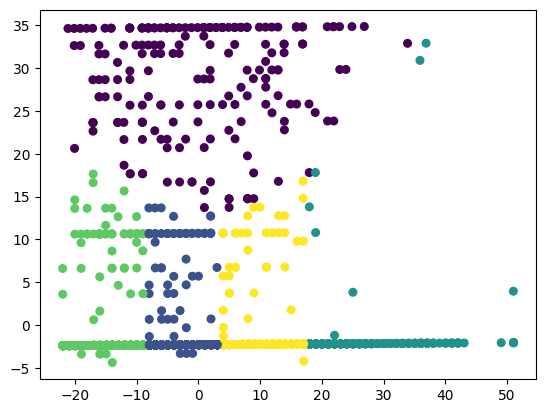

Plot for actual label training at k = 5 


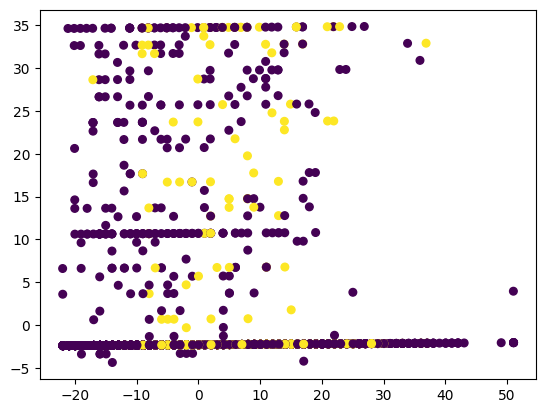

In [25]:
kmeans5 = KMeans(n_clusters = 5, random_state = 2021)
y_pred5 = kmeans5.fit_predict(X_train)

# Compute cluster centers and predict cluster index for each sample 
centers = kmeans5.cluster_centers_

# Model and fit the data to the PCA model
pca=PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

print("Plot for predicted label training at k = 5 ")
plt.scatter(x,y,c=y_pred5,s=30,cmap='viridis')
plt.show()
print("Plot for actual label training at k = 5 ")
plt.scatter(x,y,c=y_train,s=30,cmap='viridis')
plt.show()

In [26]:
#### Task 1-b-3: Visualize the predicted testing labels vs actual testing labels - 10 Points
# Create the KMeans model for k = 3
kmeans = KMeans(n_clusters = 3, random_state = 2021)
y_pred = kmeans.fit_predict(X_train)

# Compute cluster centers and predict cluster index for each sample 
centers = kmeans.cluster_centers_

# Model and fit the data to the PCA model
pca=PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

print("Plot for predicted label training at k = 3 ")
plt.scatter(x,y,c=y_pred3,s=30,cmap='viridis')
plt.show()
print("Plot for actual label training at k = 3 ")
plt.scatter(x,y,c=y_train,s=30,cmap='viridis')
plt.show()
####end Task 1-b-3

Plot for predicted label training at k = 3 


NameError: name 'y_pred3' is not defined

Plot for predicted label training at k = 4 


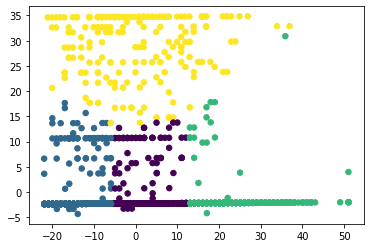

Plot for actual label training at k = 4 


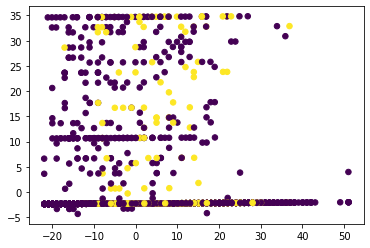

In [ ]:
# Create the KMeans model for k = 4
kmeans4 = KMeans(n_clusters = 4, random_state = 2021)
y_pred4 = kmeans4.fit_predict(X_train)

# Compute cluster centers and predict cluster index for each sample 
centers = kmeans4.cluster_centers_

# Model and fit the data to the PCA model
pca=PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

print("Plot for predicted label training at k = 4 ")
plt.scatter(x,y,c=y_pred4,s=30,cmap='viridis')
plt.show()
print("Plot for actual label training at k = 4 ")
plt.scatter(x,y,c=y_train,s=30,cmap='viridis')
plt.show()

Plot for predicted label training at k = 5 


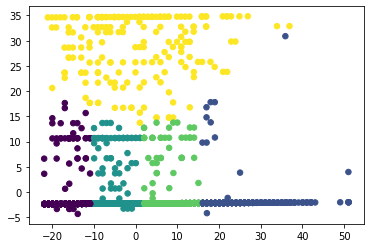

Plot for actual label training at k = 5 


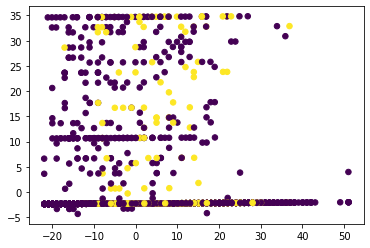

In [ ]:
kmeans5 = KMeans(n_clusters = 5, random_state = 2021)
y_pred5 = kmeans5.fit_predict(X_train)

# Compute cluster centers and predict cluster index for each sample 
centers = kmeans5.cluster_centers_

# Model and fit the data to the PCA model
pca=PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

print("Plot for predicted label training at k = 5 ")
plt.scatter(x,y,c=y_pred5,s=30,cmap='viridis')
plt.show()
print("Plot for actual label training at k = 5 ")
plt.scatter(x,y,c=y_train,s=30,cmap='viridis')
plt.show()

[[694 389  64]
 [120 203  30]
 [  0   0   0]]


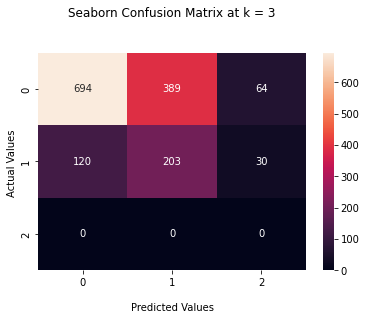

In [ ]:
######Task 1-b-4: you need to provide the evaluation of your clustering model. 
#Print out a 2D confusion matrix and Print out a 2-D confusion matrix for all K values calculated above - 05 Points
from sklearn.metrics import confusion_matrix
import seaborn as sns 

pred=kmeans.fit_predict(X_test)
cf=confusion_matrix(y_test,pred)
print(cf)
ax=sns.heatmap(cf,annot=True,fmt='d')

ax.set_title('Seaborn Confusion Matrix at k = 3\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])
plt.show()
######end Task 1-b-4

[[360 195 528  64]
 [192  89  41  31]
 [  0   0   0   0]
 [  0   0   0   0]]


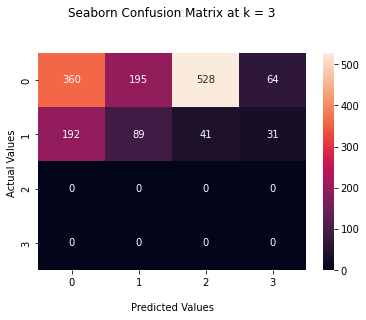

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

pred4=kmeans4.fit_predict(X_test)
cf=confusion_matrix(y_test,pred4)
print(cf)
ax=sns.heatmap(cf,annot=True,fmt='d')

ax.set_title('Seaborn Confusion Matrix at k = 3\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])
plt.show()

[[376 237  64 152 318]
 [ 10 152  31  51 109]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


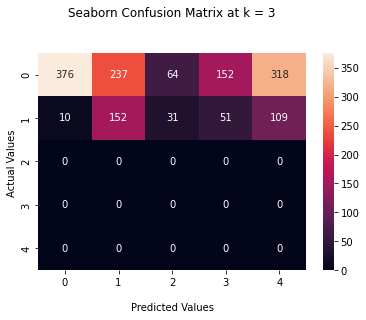

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

pred5=kmeans5.fit_predict(X_test)
cf=confusion_matrix(y_test,pred5)
print(cf)
ax=sns.heatmap(cf,annot=True,fmt='d')

ax.set_title('Seaborn Confusion Matrix at k = 3\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])
plt.show()

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

--> Perform Hierarchical Agglomerative clustering with different linkage methods for complete and average and different similarity measures for cosine, euclidean, and manhattan

--> Use F1 score for evaluation by taking number of clusters as 2.



In [ ]:
###################begin code for Task 2-a: Print out a confusion matrix - 20 Points
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete for each linkage methods and for each similarity measures.
cosine = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')  
cosine.fit_predict(X_train)

euclidean = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
euclidean.fit_predict(X_train)

manhattan = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')  
manhattan.fit_predict(X_train)

cluster_cosine = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
cluster_cosine.fit_predict(X_train)

euclidean_average = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
euclidean_average.fit_predict(X_train)

manhattan_average = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  
manhattan_average.fit_predict(X_train)


## Print the 2-D confusion matrix with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) 
##To find the best pair of linkage method and similarity measure. 

print("F1-score : complete linkage with cosine: ", f1_score(y_train, cosine.labels_))
print("F1-score : complete linkage with euclidean: ", f1_score(y_train, euclidean.labels_))
print("F1-score : complete linkage with manhattan: ", f1_score(y_train, manhattan.labels_))
print("F1-score : average linkage with cosine: ", f1_score(y_train, cluster_cosine.labels_))
print("F1-score : average linkage with euclidean: ", f1_score(y_train, euclidean_average.labels_))
print("F1-score : average linkage with manhattan: ", f1_score(y_train, manhattan_average.labels_))



###################end code for Task 2-a


F1-score : complete linkage with cosine:  0.14263074484944532
F1-score : complete linkage with euclidean:  0.235746764603008
F1-score : complete linkage with manhattan:  0.22934472934472935
F1-score : average linkage with cosine:  0.07547169811320754
F1-score : average linkage with euclidean:  0.08038277511961722
F1-score : average linkage with manhattan:  0.39408396946564883


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

--> Use the best model from above and use to visualize predicted and actual trianing samples on scatter plot. Use Pca model from X_train_pca from Task 1-b-2. 


Plot for predicted label training average linkage with manhattan: 


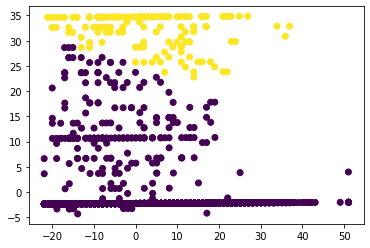

Plotting actual label training average linkage with cosine: 


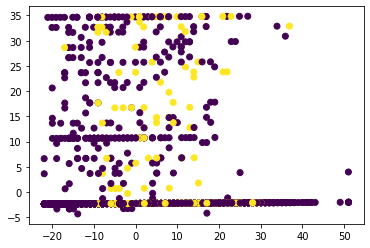

In [ ]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels - 10 Points

print("Plot for predicted label training average linkage with manhattan: ")
plt.scatter(X_train_pca[:, 0],X_train_pca[:, 1],c=cluster_cosine.labels_,cmap='viridis')
plt.show()
#we chose cosine from the above models as it gave us the highest value
# Visualize the predicted training labels versus actual training labels. 
print("Plotting actual label training average linkage with cosine: ")
plt.scatter(X_train_pca[:, 0],X_train_pca[:, 1],c=y_train,cmap='viridis')
plt.show()




###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

--> Task 3-1 Visualize Clusters :- In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. 

--> Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. Use number cluster = 2 for below example


 Plot for K-means labels


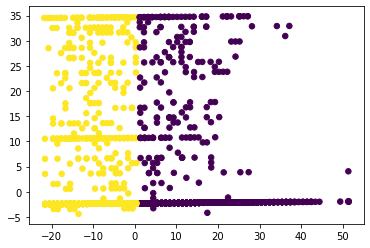

Agglomerative labels


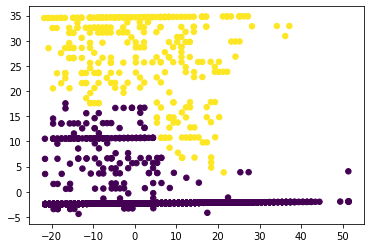

Actual labels


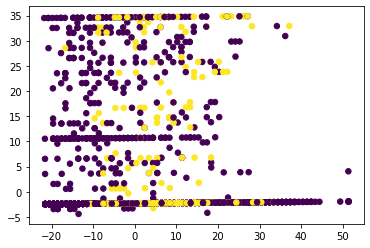

In [ ]:
#####Task 3-1: Visualize the predicted training labels vs actual training labels - 10 Points

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
kmeans = KMeans(n_clusters = 2, random_state = 2022)
y_pred = kmeans.fit_predict(X)

pca=PCA(n_components=2)
X_pca= pca.fit_transform(X)
x = X_pca[:, 0]
y = X_pca[:, 1]

print("\n Plot for K-means labels")
plt.scatter(x,y,c=y_pred,s=30,cmap='viridis')
plt.show()

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train = pairwise_distances(X)
# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
cluster_manhattan_average = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  
algo_pred = cluster_manhattan_average.fit_predict(X)

### Visualize Clusters
#  Model and fit the data to the PCA model
pca = PCA(n_components=2)
pca.fit(data)
X_pca = pca.transform(data)

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 

print("Agglomerative labels")
plt.scatter(x,y,c=algo_pred,s=30,cmap='viridis')
plt.show()


print("Actual labels")
plt.scatter(x,y,c=data['Class'],s=30,cmap='viridis')
plt.show()



######end Task 3-1

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out 2D confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model in at least 3-4 lines. Type your reasoning.

Confusion matrix: 
 [[1439 2340]
 [ 783  438]]
precision,recall,f1-score(k means): 

              precision    recall  f1-score   support

           0       0.65      0.38      0.48      3779
           1       0.16      0.36      0.22      1221

    accuracy                           0.38      5000
   macro avg       0.40      0.37      0.35      5000
weighted avg       0.53      0.38      0.42      5000



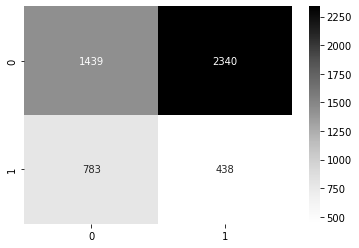

Confusion matrix : 
 [[3543  236]
 [1137   84]]
precision recall, f1score :(agglomerative clustering): 

              precision    recall  f1-score   support

           0       0.76      0.94      0.84      3779
           1       0.26      0.07      0.11      1221

    accuracy                           0.73      5000
   macro avg       0.51      0.50      0.47      5000
weighted avg       0.64      0.73      0.66      5000



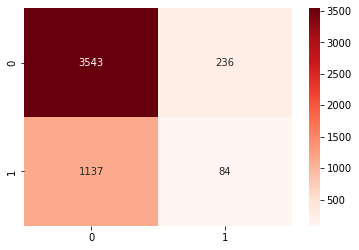

In [ ]:
######Task 3-b  - 10 Points
from sklearn.metrics import confusion_matrix, classification_report
compare = confusion_matrix(data['Class'], y_pred)
print('Confusion matrix: \n' ,compare)
ax=sns.heatmap(cm_kmeans,annot=True,cmap='Greys',fmt='d')
report = classification_report(data['Class'], y_pred)
print('precision,recall,f1-score(k means): \n')
print(report)
plt.show()

# confusion matrix and classification report for agglomerative clustering
agglomerative_clustering = confusion_matrix(data['Class'], algo_pred)
ax=sns.heatmap(agglomerative_clustering,annot=True,cmap='Reds',fmt='d')
print('Confusion matrix : \n' ,agglomerative_clustering)
print('precision recall, f1score :(agglomerative clustering): \n')
report = classification_report(data['Class'], algo_pred)
print(report)

plt.show()






######end Task 3-b

Precision comparision : Agglomerative (0.76) > Kmeans (0.65)
    recall comparision : Agglomerative (0.94) > Kmeans (0.38)
        f1-score comparision : Agglomerative (0.84) > Kmeans (0.48)
            We choose Agglomerative clustering as clearly from above comparisions, agglomerative clustering is the better option.

References :

1.https://medium.com/analytics-vidhya/k-means-clustering-43d0136bf005

2.https://stackoverflow.com/questions/18770348/hierarchical-clustering-from-confusion-matrix-with-python

3.https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019

4.https://scholar.google.com/scholar?q=hierarchical+agglomerative+clustering+visualisation+program&hl=en&as_sdt=0&as_vis=1&oi=scholart